In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition  import PCA
from tqdm import tqdm

In [3]:
dat = np.load("stringer_spontaneous.npy",allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


Givent the top 1000 components and their corresponding mask i.e. there are 7018 timebins

In [4]:
raw_masks = dat['beh_svd_mask']
masks_time = dat['beh_svd_time']
print(f"raw_masks has {raw_masks.shape} and masks_time is {masks_time.shape}")

raw_masks has (240, 320, 1000) and masks_time is (7018, 1000)


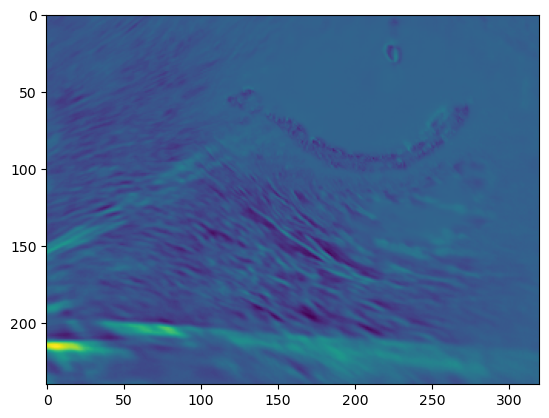

In [5]:
def get_mask(time,*, masks=raw_masks, time_arr=masks_time):
    return masks @ time_arr[time,:]

plt.imshow(get_mask(10))

In [7]:
reconstructions = np.empty_like(raw_masks)
for idx in range(reconstructions.shape[-1]):
    reconstructions[:,:,idx] = get_mask(idx)


np.save("mask_reconstructions", reconstructions, allow_pickle=True)

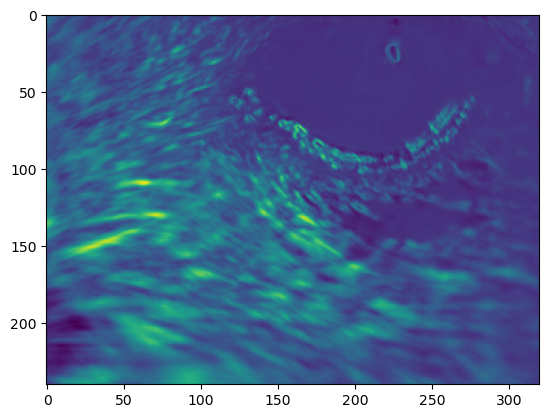

In [10]:
recon = np.load("mask_reconstructions.npy", allow_pickle=True)
plt.imshow(recon[:,:,1])